In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from model import RegressionModel

In [2]:
stats_data = pd.read_csv('all_player_stats.csv')
income_data = pd.read_csv('all_season_income.csv')
joined = pd.merge(stats_data, income_data, how = 'inner')
joined.replace(r'\N',0, inplace=True) # so model can interpret NAs, more viable option would be to remove rows w/ NAs
joined.head(5)

,player_id,season,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,income,adj_income
0,1,2001,PF,37,MIA,82,1,17.2,1.8,4.0,...,2.5,3.8,0.5,0.4,0.1,0.5,1.5,4.5,2250000,3981991
1,2230,2023,SG,23,MIL,35,1,9.9,1.5,3.6,...,1.1,1.3,0.6,0.2,0.0,0.3,0.9,4.4,508891,524000
2,2230,2024,SG,24,MIL,56,0,11.0,1.5,3.5,...,1.0,1.1,0.5,0.2,0.1,0.2,0.9,4.5,1901769,1901769
3,2231,2023,SF,19,ATL,72,12,19.5,3.4,7.4,...,1.6,2.1,1.0,0.6,0.2,0.6,1.2,8.9,3536160,3641154
4,2231,2024,SF,20,ATL,20,0,8.6,0.9,3.1,...,0.8,0.9,0.3,0.1,0.1,0.4,0.3,2.4,3712920,3712920


In [3]:
joined.columns
X = joined[['Age', 'G', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS']]
y = joined['income']

<Axes: title={'center': 'Correlation Matrix For Features'}>

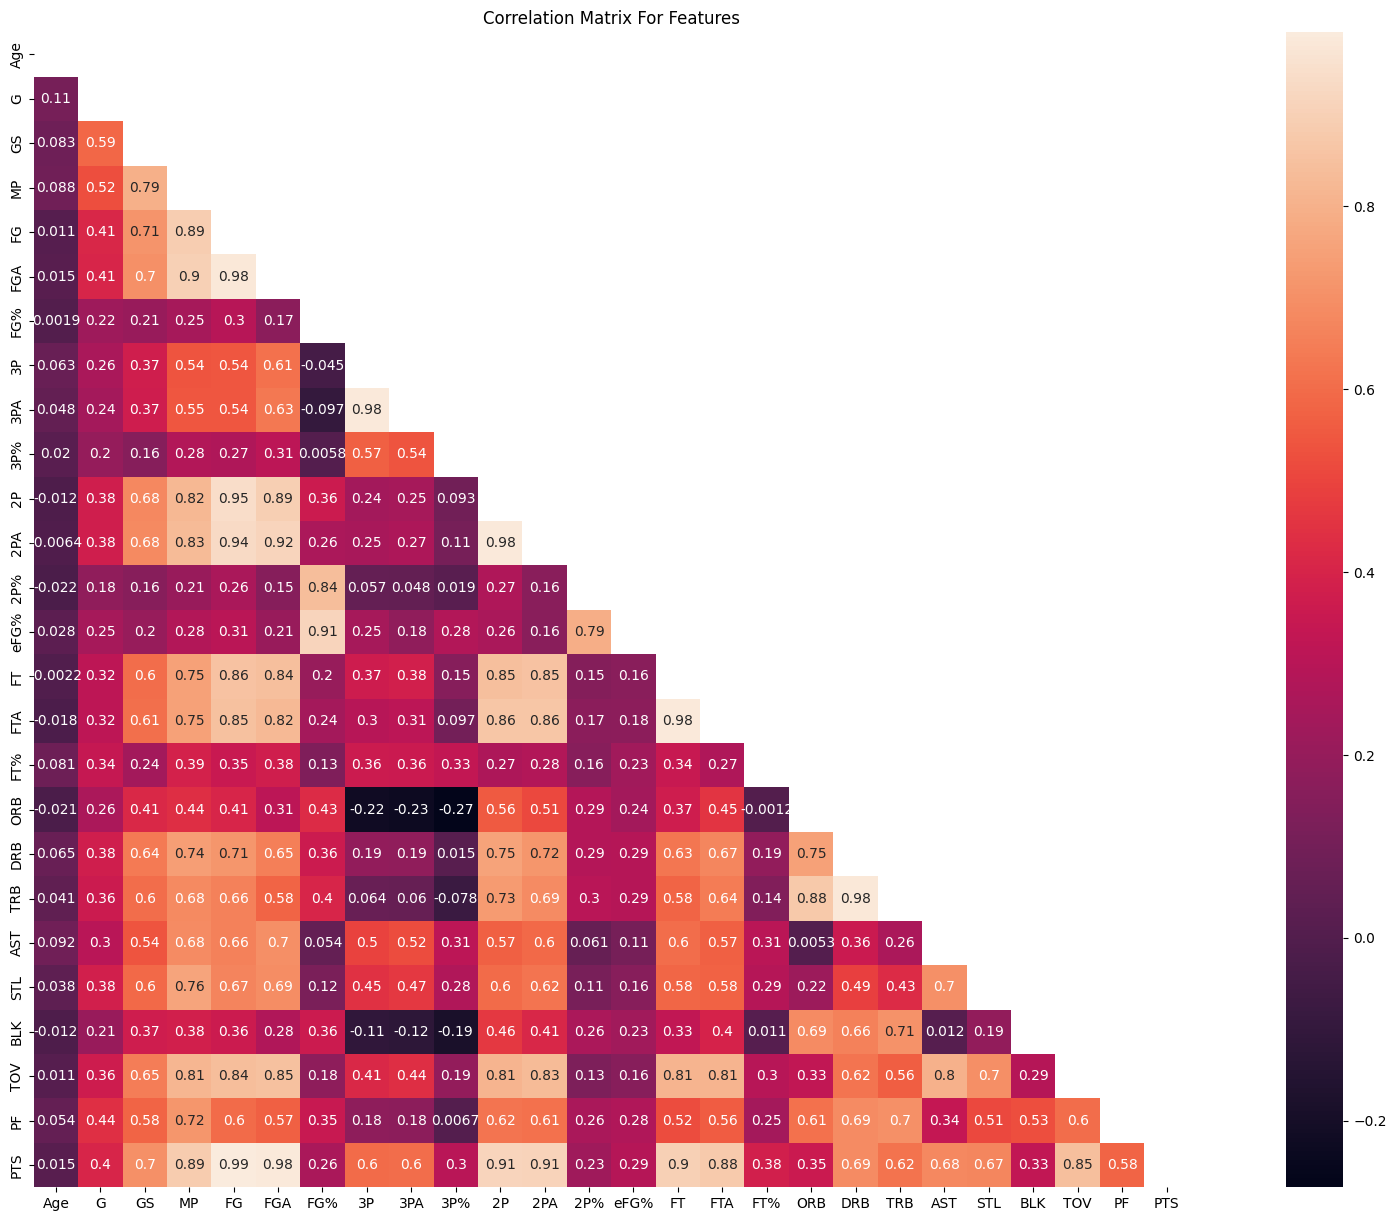

In [4]:
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = [25,15])
plt.title("Correlation Matrix For Features")
sns.heatmap(corr, mask=mask, annot = True, square=True)

In [5]:
model = RegressionModel(X = X, y = y)
X_train, X_test, y_train, y_test, y_pred = model.split_train_predict(test_size=0.33)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   13.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


### Test Accuracy ###: 0.6554557199264033, ### MSE ###: 14827712654645.76


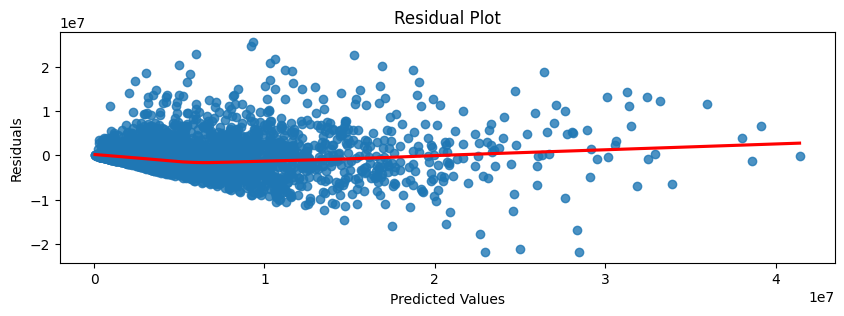

In [6]:
model.get_accuracy(y_test, y_pred)

In [7]:
# 10 fold cross validation
display(model.cross_val(n_splits=10))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   20.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    8.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   23.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   19.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:   23.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Do

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_mean_squared_error,fold
0,20.681202,0.108074,0.667923,-1.429363e+13,1.429363e+13,1.0
1,23.473570,0.087534,0.638130,-1.536409e+13,1.536409e+13,2.0
2,19.989913,0.086933,0.695088,-1.506889e+13,1.506889e+13,3.0
3,23.115964,0.108751,0.661049,-1.573300e+13,1.573300e+13,4.0
4,19.276593,0.054978,0.642407,-1.584692e+13,1.584692e+13,5.0
5,19.323246,0.061913,0.635905,-1.655148e+13,1.655148e+13,6.0
6,21.565388,0.088613,0.632861,-1.683938e+13,1.683938e+13,7.0
7,19.615686,0.080759,0.664006,-1.439221e+13,1.439221e+13,8.0
8,19.577770,0.082228,0.652353,-1.630256e+13,1.630256e+13,9.0
9,22.442954,0.108122,0.665843,-1.436083e+13,1.436083e+13,10.0
